Explantory Data Analysis

In [13]:
#Required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import empiricaldist

ModuleNotFoundError: No module named 'empiricaldist'

In [2]:
#PART1
#Here we  will read in the data in to a pd data frame
nsfg = pd.read_hdf("C:\\Users\\Cathal Keating\\Desktop\\DataCamp\\Exploratory Data Analysis\\nsfg.hdf5", 'nsfg')
#Just checking all looks good
print(type(nsfg))

<class 'pandas.core.frame.DataFrame'>


In [3]:
#We can check a few initial things:
print(nsfg.shape)
print(nsfg.columns)

(9358, 10)
Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')


In [5]:
#Do a deeper dive into pounds and ounces
#Select the desired columns
pounds = nsfg['birthwgt_lb1']
ounces = nsfg['birthwgt_oz1']

#Sort and have a look:
print(pounds.value_counts().sort_index())


0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64


In [6]:
#Deeper dive 2
#remove the 98's and 99's
pounds = pounds.replace([98, 99], np.nan)
ounces = ounces.replace([98, 99], np.nan)

#resort and have another look
print(pounds.value_counts().sort_index())

#lastly lets convert the punds and ounces into a total
birth_weight = pounds + ounces / 16
print(birth_weight.describe())

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
Name: birthwgt_lb1, dtype: int64
count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

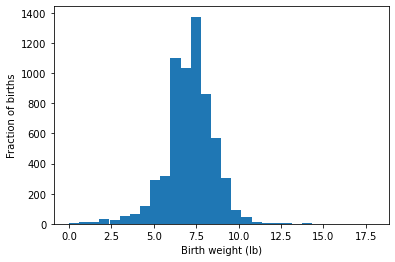

In [9]:
#Lets plot the results of birthweight for a look
plt.hist(birth_weight.dropna(), bins = 30)
plt.xlabel('Birth weight (lb)')
plt.ylabel('Fraction of births')
plt.show

In [12]:
#Lets do some filtering for practice
#Lets define preterm pregnancies as pregnancies before 37 weeks
preterm = nsfg['prglngth'] < 37
#Some testing
print(preterm.head())
print(preterm.sum())
print(preterm.mean())

#ok so filter out the preterm and the full term
preterm_weight = birth_weight[preterm]
print(preterm_weight.mean())

full_term_weight = birth_weight[~preterm]
print(full_term_weight.mean())

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool
3742
0.39987176747168196
5.577598314606742
7.372323879231473


In [ ]:
#PART 2
#Distributions